<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Preprocessing
</div>

## 1. Import th∆∞ vi·ªán c·∫ßn thi·∫øt

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

## 2. Kh√°m ph√° d·ªØ li·ªáu

### 2.1 ƒê·ªçc d·ªØ li·ªáu t·ª´ file <font color="blue">"steam_game.csv" </font>


In [2]:
df = pd.read_csv('../data/steam_game_p2.csv')
df.head(10)

Title                                   Genre  \
0   Baldur's Gate 3                Adventure, RPG, Strategy   
1  Counter-Strike 2                    Action, Free to Play   
2    Lethal Company  Action, Adventure, Indie, Early Access   
3    Cyberpunk 2077                                     RPG   
4        ELDEN RING                             Action, RPG   
5     Apex Legends‚Ñ¢         Action, Adventure, Free to Play   
6            Dota 2          Action, Strategy, Free to Play   
7   Hogwarts Legacy                  Action, Adventure, RPG   
8  Dead by Daylight                                  Action   
9   Project Zomboid    Indie, RPG, Simulation, Early Access   

                                                Tags  withDLC  isMature  \
0  RPG, Choices Matter, Story Rich, Character Cus...      1.0       1.0   
1  FPS, Shooter, Multiplayer, Competitive, Action...      1.0       1.0   
2  Online Co-Op, Horror, First-Person, Psychologi...      0.0       1.0   
3  Cyberpunk, Open World, Nudity, RPG, Singleplay...      1.0       1.0   
4  Souls-like, Dark Fantasy, Open World, RPG, Dif...      0.0       1.0   
5  Free to Play, Battle Royale, Multiplayer, Shoo...      0.0       0.0   
6  Free to Play, MOBA, Multiplayer, Strategy, eSp...      1.0       0.0   
7  Magic, Fantasy, Open World, Singleplayer, Adve...      1.0       0.0   
8  Horror, Survival Horror, Multiplayer, Online C...      1.0       1.0   
9  Survival, Zombies, Open World, Open World Surv...      0.0       0.0   

                    Franchise   ReleaseDate                   Developer  \
0               Baldur's Gate   3 Aug, 2023              Larian Studios   
1                         NaN  21 Aug, 2012                       Valve   
2                         NaN  23 Oct, 2023                    Zeekerss   
3                         NaN   9 Dec, 2020              CD PROJEKT RED   
4  Bandai Namco Entertainment  24 Feb, 2022           FromSoftware Inc.   
5                Apex Legends   4 Nov, 2020       Respawn Entertainment   
6                        Dota   9 Jul, 2013                       Valve   
7                    WB Games  10 Feb, 2023          Avalanche Software   
8            Dead by Daylight  14 Jun, 2016  Behaviour Interactive Inc.   
9                         NaN   8 Nov, 2013             The Indie Stone   

                    Publisher  \
0              Larian Studios   
1                       Valve   
2                    Zeekerss   
3              CD PROJEKT RED   
4           FromSoftware Inc.   
5             Electronic Arts   
6                       Valve   
7          Warner Bros. Games   
8  Behaviour Interactive Inc.   
9             The Indie Stone   

                                           Languages PositiveReviews  \
0  English, French, German, Spanish - Spain, Poli...       (498,632)   
1  English, Czech, Danish, Dutch, Finnish, French...     (6,845,621)   
2                                            English       (218,847)   
3  English, French, Italian, German, Spanish - Sp...       (564,519)   
4  English, French, Italian, German, Spanish - Sp...       (688,189)   
5  English, French, Italian, German, Spanish - Sp...       (613,541)   
6  English, Bulgarian, Czech, Danish, Dutch, Finn...     (1,758,564)   
7  English, French, Italian, German, Spanish - Sp...       (225,796)   
8  English, French, Italian, German, Spanish - Sp...       (565,863)   
9  English, French, Italian, German, Spanish - Sp...       (246,145)   

  TotalReviews NegativeReviews  OriginalPrice DiscountPercent  
0    (515,427)        (16,795)    990.000,00‚Ç´            -10%  
1  (7,809,836)       (964,215)           Free             NaN  
2    (222,992)         (4,145)    142.000,00‚Ç´             NaN  
3    (697,970)       (133,451)    990.000,00‚Ç´            -50%  
4    (744,999)        (56,810)    898.000,00‚Ç´            -40%  
5    (773,739)       (160,198)           Free             NaN  
6  (2,142,374)       (383,810)           Free        

### 2.2 Ta xem x√©t c√≥ t·ªïng c·ªông bao nhi√™u h√†ng v√† c·ªôt thu·ªôc t√≠nh ·ªü t·∫≠p d·ªØ li·ªáu th√¥ 
N·∫øu d·ªØ li·ªáu c√≥ tr√™n 1000 d√≤ng v√† ph·∫£i c√≥ tr√™n 5 c·ªôt thu·ªôc t√≠nh th√¨ d·ªØ li·ªáu m·ªõi ƒë·ªß ƒë·ªÉ ti·∫øn h√†nh c√°c b∆∞·ªõc khai th√°c, x√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y, h·ªçc s√¢u, ... 

Ng∆∞·ª£c l·∫°i, d·ªØ li·ªáu qu√° √≠t, kh√¥ng ƒë·ªß -> c·∫ßn thu th·∫≠p th√™m d·ªØ li·ªáu

In [3]:
num_rows, num_cols = df.shape
print(f'Current shape of data: {df.shape}')
if (num_rows > 100) & (num_cols > 5):
    print('Data is good !')
else:
    print('You should collect more data')

Current shape of data: (9583, 15)
Data is good !


### 2.3 Ta xem x√©t √Ω nghƒ©a c·ªßa t·ª´ng c·ªôt d·ªØ li·ªáu
1. Title: T√™n tr√≤ ch∆°i ƒëi·ªán t·ª≠ tr√™n website steam
2. Genre: Th·ªÉ lo·∫°i tr√≤ ch∆°i
3. Tags: c√°c nh√£n tr√≤ ch∆°i m√† ng∆∞·ªùi d√πng(ng∆∞·ªùi ch∆°i) g·∫Øn cho tr√≤ ch∆°i
4. withDLC: tr√≤ ch∆°i c√≥ k√®m theo c√°c downloadable content hay kh√¥ng ?	
5. isMature: tr√≤ ch∆°i c√≥ ƒë∆∞·ª£c g√°n nh√£n kh√¥ng ph√π h·ª£p cho tr·∫ª nh·ªè hay kh√¥ng?
6. Franchise: t√™n th∆∞∆°ng hi·ªáu c·ªßa tr√≤ ch∆°i	
7. ReleaseDate: Ng√†y ph√°t h√†nh c·ªßa tr√≤ ch∆°i	
8. Developer: Nh√† ph√°t tri·ªÉn tr√≤ ch∆°i	
9. Publisher: Nh√† ph√°t h√†nh tr√≤ ch∆°i
10. Languages: C√°c ng√¥n ng·ªØ ƒë∆∞·ª£c h·ªó tr·ª£ trong tr√≤ ch∆°i	
11. PositiveReviews: S·ªë ƒë√°nh gi√° t√≠ch c·ª±c v·ªÅ tr√≤ ch∆°i	
12. TotalReviews: T·ªïng s·ªë ƒë√°nh gi√° c·ªßa ng∆∞·ªùi ch∆°i v·ªÅ tr√≤ ch∆°i
13. NegativeReviews: S·ªë ƒë√°nh gi√° ti√™u c·ª±c v·ªÅ tr√≤ ch∆°i
14. OriginalPrice: Gi√° b√°n g·ªëc c·ªßa tr√≤ ch∆°i
15. DiscountPercent: Gi·∫£m gi√° √°p d·ª•ng tr√™n gi√° g·ªëc(%)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9531 non-null   object 
 1   Genre            9515 non-null   object 
 2   Tags             9531 non-null   object 
 3   withDLC          9583 non-null   float64
 4   isMature         9583 non-null   float64
 5   Franchise        4576 non-null   object 
 6   ReleaseDate      9526 non-null   object 
 7   Developer        9525 non-null   object 
 8   Publisher        9509 non-null   object 
 9   Languages        9531 non-null   object 
 10  PositiveReviews  9518 non-null   object 
 11  TotalReviews     9518 non-null   object 
 12  NegativeReviews  9518 non-null   object 
 13  OriginalPrice    9583 non-null   object 
 14  DiscountPercent  8220 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### 2.4 X·ª≠ l√≠ missing value
Ki·ªÉm tra xem m·ªói feature chi·∫øm nhi√™u % missing value:

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title               0.542628
Genre               0.709590
Tags                0.542628
withDLC             0.000000
isMature            0.000000
Franchise          52.248774
ReleaseDate         0.594803
Developer           0.605238
Publisher           0.772201
Languages           0.542628
PositiveReviews     0.678284
TotalReviews        0.678284
NegativeReviews     0.678284
OriginalPrice       0.000000
DiscountPercent    14.223103
dtype: float64

Ta s·∫Ω t√≠nh l·∫°i gi√° tr·ªã ·ªü c·ªôt *OriginalPrice* sau khi ƒë√£ √°p d·ª•ng gi·∫£m gi√° ƒë·ªÉ c√≥ c√°i nh√¨n ch√≠nh x√°c v·ªÅ gi√° ti·ªÅn th·∫≠t s·ª± ng∆∞·ªùi mua h√†ng ph·∫£i b·ªè ra, sau ƒë√≥ ƒë·ªïi t√™n th√†nh *DiscountedPrice*.

Tr∆∞·ªõc h·∫øt, ta s·∫Ω chuy·ªÉn t·∫•t c·∫£ gi√° tr·ªã v·ªõi ƒë∆°n v·ªã ti·ªÅn t·ªá "$" sang "VND", ti·∫øn h√†ng lo·∫°i b·ªè k√≠ t·ª± hi·ªÉn th·ªã ƒë∆°n v·ªã ti·ªÅn t·ªá, ƒë∆∞a gi√° tr·ªã "Free" th√†nh 0 ·ªü c·ªôt *OriginalPrice*

In [6]:
# H√†m chuy·ªÉn ƒë·ªïi gi√° tr·ªã c·ªôt Price
def convert_price(price):
    if price == "Free":
        return 0.0
    elif '‚Ç´' in price:
        formatted_price = float(price[: -4].replace('‚Ç´', '').replace('.', '').replace(',', ''))
        return round(formatted_price, 2)
    elif '$' in price:
        usd_to_vnd = 24265
        formatted_price =  float(price.replace('$', '')) * usd_to_vnd
        return round(formatted_price, 2)

df['OriginalPrice'] = df['OriginalPrice'].apply(convert_price) 

In [7]:
# H√†m chuy·ªÉn ƒë·ªïi gi√° tr·ªã c·ªôt Discount
def convert_discount(discount):
    if pd.isna(discount):
        return 0
    else:
        return float(discount.replace('-', '').replace('%', '')) * 0.01

df['DiscountPercent'] = df['DiscountPercent'].apply(convert_discount)

In [8]:
# H√†m t√≠nh t·ªïng Price sau khi √°p d·ª•ng Discount
def price_after_discount(x):
    discount_percent = x['DiscountPercent']
    if pd.isna(discount_percent):
        return x['OriginalPrice']
    else:
        return x['OriginalPrice'] * (1 - discount_percent)

df['DiscountedPrice'] = df.apply(price_after_discount, axis = 1)

B√¢y gi·ªù ki·ªÉm tra c·ªôt m·ªõi `DiscountedPrice`

In [9]:
df['DiscountedPrice']

0       891000.0
1            0.0
2       142000.0
3       495000.0
4       538800.0
          ...   
9578         0.0
9579     33750.0
9580         0.0
9581     87500.0
9582     73500.0
Name: DiscountedPrice, Length: 9583, dtype: float64

#### V√¨ c·ªôt Franchise ch·ª©a qu√° nhi·ªÅu d·ªØ li·ªáu b·ªã thi·∫øu (h∆°n 50%), nh∆∞ng l·∫°i kh√¥ng th·ªÉ "fill" gi√° tr·ªã ng·∫´u nhi√™u n√†o, hay c√≥ gi√° tr·ªã ƒë·∫∑c th√π n√†o c√≥ th·ªÉ thay th·∫ø nh·ªØng d·ªØ li·ªáu b·ªã thi·∫øu m√† kh√¥ng g√¢y nhi·ªÖu

N√™n ta ch·ªçn lo·∫°i b·ªè h·∫≥n c·ªôt n√†y ra kh·ªèi dataframe

In [10]:
df.drop(columns = ['Franchise'], inplace = True)

Lo·∫°i b·ªè c√°c game c√≥ `Title` l√† NaN

In [11]:
df.dropna(subset=['Title'], inplace=True)

Ki·ªÉm tra d·ªØ li·ªáu ·ªü c·ªôt *Release Date*, n·∫øu gi√° tr·ªã l√† Nan, ƒë·ªìng nghƒ©a v·ªõi tr√≤ ch∆°i ƒëi·ªán t·ª≠ n√†y ch∆∞a ƒë∆∞·ª£c ph√°t h√†nh ch√≠nh th·ª©c n√™n x√≥a kh·ªèi dataframe.

In [12]:
df.dropna(subset = 'ReleaseDate', inplace = True)

In [13]:
# Check missing value
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.000000
Genre              0.167961
Tags               0.000000
withDLC            0.000000
isMature           0.000000
ReleaseDate        0.000000
Developer          0.062986
Publisher          0.230947
Languages          0.000000
PositiveReviews    0.136469
TotalReviews       0.136469
NegativeReviews    0.136469
OriginalPrice      0.000000
DiscountPercent    0.000000
DiscountedPrice    0.000000
dtype: float64

#### D·ªØ li·ªáu v·∫´n ƒëang c√≤n missing value!

### 2.5 Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu ph√π h·ª£p v·ªõi c·ªôt
ƒê·∫ßu ti√™n ta xem x√©t type c·ªßa c√°c c·ªôt

In [14]:
df.dtypes

Title               object
Genre               object
Tags                object
withDLC            float64
isMature           float64
ReleaseDate         object
Developer           object
Publisher           object
Languages           object
PositiveReviews     object
TotalReviews        object
NegativeReviews     object
OriginalPrice      float64
DiscountPercent    float64
DiscountedPrice    float64
dtype: object

M·ªôt s·ªë c·ªôt c√≥ ki·ªÉu d·ªØ li·ªáu ch∆∞a ph√π h·ª£p nh∆∞ `ReleaseDate`, `PositiveReviews`, `TotalReviews` v√† `NegativeReviews`. Ta s·∫Ω ƒëi·ªÅu ch·ªânh c√°c c·ªôt d·ªØ li·ªáu n√†y.

ƒêi·ªÅu ch·ªânh ƒë·ªãnh d·∫°ng c·ªßa c√°c c·ªôt `PositiveReviews`, `TotalReviews` v√† `NegativeReviews` th√†nh ki·ªÉu `float`.

In [15]:
def format_reviews_col(review):
    regex = r'[(),]'
    # review = review.replace('.0', '')
    replacement = re.sub(regex, '', str(review))
    return replacement

cols_review = ['PositiveReviews', 'TotalReviews', 'NegativeReviews']
df[cols_review] = df[cols_review].applymap(format_reviews_col)
df[cols_review] = df[cols_review].astype(np.float64)

In [16]:
df[cols_review]

PositiveReviews  TotalReviews  NegativeReviews
0            498632.0      515427.0          16795.0
1           6845621.0     7809836.0         964215.0
2            218847.0      222992.0           4145.0
3            564519.0      697970.0         133451.0
4            688189.0      744999.0          56810.0
...               ...           ...              ...
9578             84.0         101.0             17.0
9579            372.0         453.0             81.0
9580            142.0         191.0             49.0
9581             57.0          61.0              4.0
9582            221.0         246.0             25.0

[9526 rows x 3 columns]

Chuy·ªÉn c·ªôt *ReleaseDate* v·ªÅ ki·ªÉu `datetime`

In [17]:
def convert_to_datetime(date_str):
    formats = [r'%b %d, %Y', r'%d %b, %Y', r'%b %Y']
    for format in formats:
        try:
            return dt.strptime(date_str, format)
        except ValueError:
            pass
    return np.nan

df['ReleaseDate'] = df['ReleaseDate'].apply(convert_to_datetime)

In [18]:
# Check
type(df['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9526 entries, 0 to 9582
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            9526 non-null   object        
 1   Genre            9510 non-null   object        
 2   Tags             9526 non-null   object        
 3   withDLC          9526 non-null   float64       
 4   isMature         9526 non-null   float64       
 5   ReleaseDate      9525 non-null   datetime64[ns]
 6   Developer        9520 non-null   object        
 7   Publisher        9504 non-null   object        
 8   Languages        9526 non-null   object        
 9   PositiveReviews  9513 non-null   float64       
 10  TotalReviews     9513 non-null   float64       
 11  NegativeReviews  9513 non-null   float64       
 12  OriginalPrice    9526 non-null   float64       
 13  DiscountPercent  9526 non-null   float64       
 14  DiscountedPrice  9526 non-null   float64

Missing value ·ªü c√°c v·∫´n c√≤n t·ªìn t·∫°i ·ªü kh√° nhi·ªÅu thu·ªôc t√≠nh, tuy nhi√™n s·ªë l∆∞·ª£ng kh√¥ng ƒë√°ng k·ªÉ n√™n ta c√≥ th·ªÉ fill c√°c d√≤ng n√†y:

In [20]:
df['Genre'].fillna(df['Genre'].mode().values[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode().values[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode().values[0], inplace=True)
df['ReleaseDate'].fillna(df['ReleaseDate'].mode().values[0], inplace=True)
df['PositiveReviews'].fillna(df['PositiveReviews'].mode().values[0], inplace=True)
df['TotalReviews'].fillna(df['TotalReviews'].mode().values[0], inplace=True)
df['NegativeReviews'].fillna(df['NegativeReviews'].mode().values[0], inplace=True)
df['OriginalPrice'].fillna(df['OriginalPrice'].mode().values[0], inplace=True)
df['DiscountPercent'].fillna(df['DiscountPercent'].mode().values[0], inplace=True)
df['DiscountedPrice'].fillna(df['DiscountedPrice'].mode().values[0], inplace=True)

Ki·ªÉm tra th√™m m·ªôt l·∫ßn n·ªØa:


In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.0
Genre              0.0
Tags               0.0
withDLC            0.0
isMature           0.0
ReleaseDate        0.0
Developer          0.0
Publisher          0.0
Languages          0.0
PositiveReviews    0.0
TotalReviews       0.0
NegativeReviews    0.0
OriginalPrice      0.0
DiscountPercent    0.0
DiscountedPrice    0.0
dtype: float64

### 2.6 Ki·ªÉm tra t√≠nh to√†n v·∫πn d·ªØ li·ªáu

Ta s·∫Ω t√≠nh t·ªïng c·ªôt positive v√† negative reviews c√≥ b·∫±ng gi√° tr·ªã ·ªü c·ªôt Total review hay kh√¥ng?

In [22]:
check_review_cols = (df['NegativeReviews'] + df['PositiveReviews'] == df['TotalReviews']).sum()
check_sum = check_review_cols.sum()
if check_sum == df.shape[0]:
    print('Data in Review columns are good !!!')
else:
    print('Have to update the value in Positive or Negative review using Total and another')

Have to update the value in Positive or Negative review using Total and another


In [23]:
mask = df['NegativeReviews'] + df['PositiveReviews'] != df['TotalReviews']
df.loc[mask, 'NegativeReviews'] = df.loc[mask, 'TotalReviews'] - df.loc[mask, 'PositiveReviews']

### 2.7 Ki·ªÉm tra s·ª± tr√πng l·∫∑p d·ªØ li·ªáu 

Tr∆∞·ªõc khi t√≠nh Rating cho t·ª´ng tr√≤ ch∆°i ƒëi·ªán t·ª≠, ta ki·ªÉm tra c√°c c·ªôt c√≥ b·ªã tr√πng nhau kh√¥ng.

S·ª± tr√πng l·∫∑p s·∫Ω d·ª±a tr√™n c·ªôt **Title**, n·∫øu c√≥ s·ª± tr√πng l·∫∑p th√¨ ti·∫øn h√†nh lo·∫°i b·ªè v√† gi·ªØ l·∫°i s·ª± xu·∫•t hi·ªán ƒë·∫ßu ti√™n

In [24]:
num_duplicated_rows = df.duplicated('Title').sum()
if num_duplicated_rows == 0:
    print('Data is good with no duplicated rows')
else:
    print('Drop duplicated rows, but keep first occurence')

df.drop_duplicates(keep = 'first', inplace = True)

Drop duplicated rows, but keep first occurence


## 3. Ph√¢n t√≠ch c·ªôt d·ªØ li·ªáu s·ªë (numerical feature)

In [25]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

withDLC     isMature  PositiveReviews  TotalReviews  \
count  9269.000000  9269.000000     9.269000e+03  9.269000e+03   
mean      0.449563     0.218254     8.497340e+03  9.664013e+03   
std       0.497476     0.413083     8.242057e+04  9.349747e+04   
min       0.000000     0.000000     6.000000e+00  9.000000e+00   
25%       0.000000     0.000000     2.140000e+02  2.550000e+02   
50%       0.000000     0.000000     7.590000e+02  9.010000e+02   
75%       1.000000     0.000000     3.060000e+03  3.605000e+03   
max       1.000000     1.000000     6.845621e+06  7.809836e+06   

       NegativeReviews  OriginalPrice  DiscountPercent  DiscountedPrice  
count      9269.000000   9.269000e+03      9269.000000     9.269000e+03  
mean       1166.672564   2.366783e+05         0.444999     1.210667e+05  
std       11853.421971   2.129635e+05         0.270401     1.361701e+05  
min         -22.000000   0.000000e+00         0.000000     0.000000e+00  
25%          27.000000   1.200000e+05         0.250000     4.625000e+04  
50%         111.000000   1.880000e+05         0.500000     8.460000e+04  
75%         470.000000   2.600000e+05         0.700000     1.505000e+05  
max      964215.000000   2.400000e+06         0.980000     2.400000e+06

### Quan s√°t b·∫£ng m√¥ t·∫£ s·ªë li·ªáu ta th·∫•y:
- Ta th·∫•y trong d·ªØ li·ªáu sau khi lo·∫°i b·ªè c√°c missing value th√¨ c√≤n 1728 d√≤ng.
- S·ªë ƒëi·ªÉm trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c game l√† x·∫•p x·ªâ 0.9, s·ªë ƒëi·ªÉm th·∫•p nh·∫•t l√† 0.76, v√† cao nh·∫•t l√† 0.97.

### 3.1 Ki·ªÉm tra xem d·ªØ li·ªáu c√≥ gi√° nh·ªØng gi√° tr·ªã ngo·∫°i lai `outliers` kh√¥ng:

<Figure size 4000x9000 with 0 Axes>

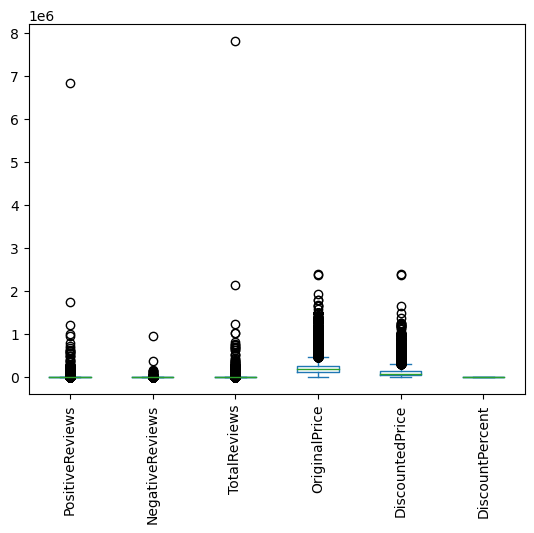

In [26]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
plt.figure(figsize=(40,90))
df[numeric_cols].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Ta th·∫•y nh·ªØng gi√° tr·ªã n√†y c√≥ m·ªôt s·ªë `outliers`. Gi·ªù ta s·∫Ω ti·∫øn h√†nh x√≥a c√°c d√≤ng ch·ª©a gi√° tr·ªã n√†y

In [27]:
# H√†m lo·∫°i b·ªè gi√° tr·ªã ngo·∫°i lai
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

X√≥a c√°c outliers:

In [28]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'OriginalPrice', 'DiscountedPrice', 'DiscountPercent']
for col in numeric_cols:
    df[col] = BoxplotOutlierClipper().fit_transform(df[col])
# df.reset_index(inplace=True, drop=True)

<Figure size 7000x9000 with 0 Axes>

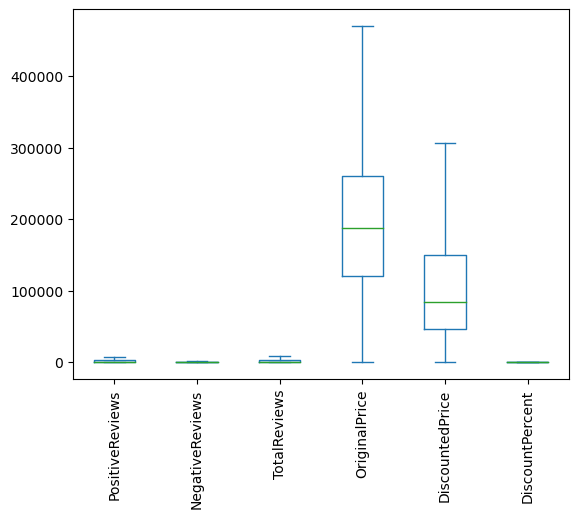

In [29]:
plt.figure(figsize=(70,90))
df[numeric_cols].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

### 3.2 Ki·ªÉm tra xem c√≥ bao nhi√™u th·ªÉ lo·∫°i (Genre) t·ª´ nh·ªØng game ta ƒë·ªçc ƒë∆∞·ª£c?
- Vi·ªác n√†y s·∫Ω gi√∫p ta l·ª±a ch·ªçn ki·ªÉu encoding cho c√°c d·ªØ li·ªáu categorical m·ªôt c√°ch h·ª£p l√≠.

Tr∆∞·ªõc h·∫øt ta s·∫Ω ki·ªÉm tra xem nh·ªØng gi√° tr·ªã unique trong `Genre`:

In [30]:
def get_unique_values(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    feature_as_str = set(feature_as_str)
    return len(feature_as_str)

L·∫•y s·ªë l∆∞·ª£ng c√°c unique `Genre`: 

In [31]:
unique_genres = get_unique_values('Genre')
print(f'S·ªë l∆∞·ª£ng unique genre: {unique_genres}')

S·ªë l∆∞·ª£ng unique genre: 15


Ta th·ª≠ ki·ªÉm tra xem nh·ªØng genre ƒë∆∞·ª£c ph√¢n b·ªë nh∆∞ th·∫ø n√†o:

In [32]:
def get_distributed_cat(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    distributed_dict = {}
    
    for index, item in temp.items():
        
        for element in item.split(', '):
            if element in distributed_dict:
                # If this tag already existed in the dictionary, increase the count
                distributed_dict[element] += 1
            else:
                # Else add the tag in the dictionary with count 1
                distributed_dict[element] = 1
        
    return distributed_dict

{'Indie': 5235, 'Adventure': 4025, 'Action': 4012, 'Simulation': 2437, 'RPG': 2415, 'Casual': 2406, 'Strategy': 2281, 'Early Access': 896, 'Free to Play': 449, 'Sports': 407, 'Massively Multiplayer': 337, 'Racing': 333, 'Utilities': 2, 'Audio Production': 1, 'Education': 1}


<Axes: title={'center': 'Ph√¢n b·ªë genre'}>

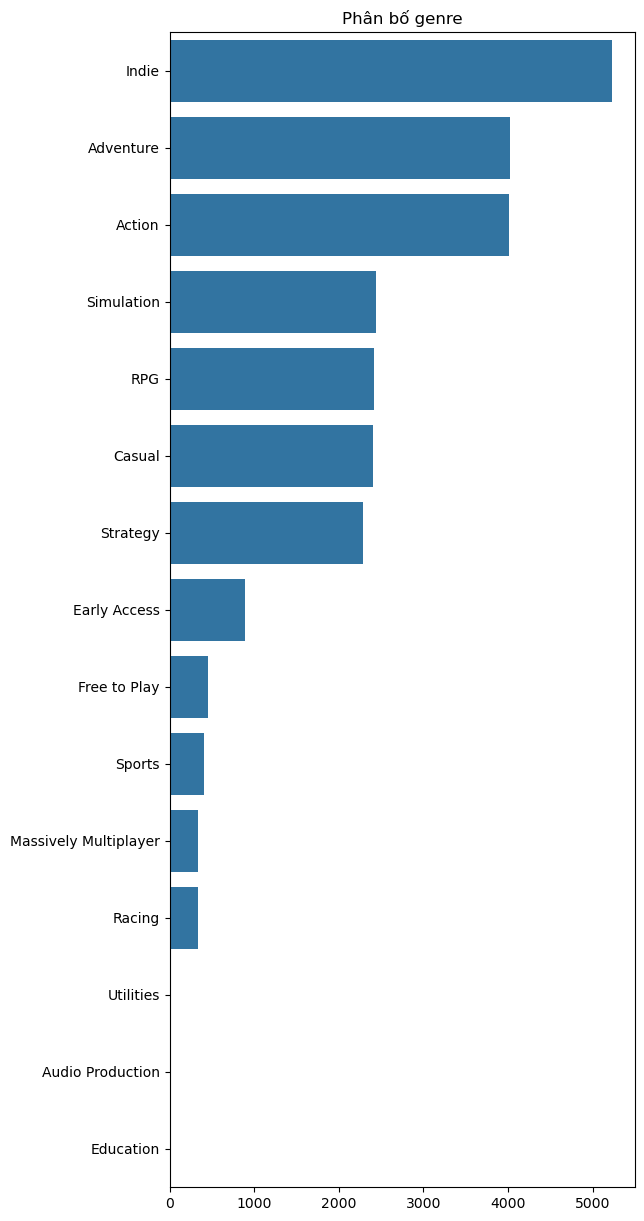

In [33]:
distributed_genre = get_distributed_cat('Genre')
distributed_genre = dict(sorted(distributed_genre.items(), key=lambda item: item[1],reverse=True))
print(distributed_genre)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Ph√¢n b·ªë genre")
sns.barplot(x=list(distributed_genre.values()), y=list(distributed_genre.keys()), ax=ax)

Nh√¨n tr√™n bi·ªÉu ƒë·ªì, ta th·∫•y s·ªë l∆∞·ª£ng game c√≥ genre l√† `Indie` chi·∫øm r·∫•t nhi·ªÅu, trong khi ƒë√≥ m·ªôt s·ªë genre ch·ªâ ƒë∆∞·ª£c ch·ªâ c√≥ trong 1 game m√† ch√∫ng ta ƒë√£ thu th·∫≠p.

Ti·∫øp theo ta th·ª≠ ki·ªÉm tra s·ªë l∆∞·ª£ng c√°c `Tags` nh∆∞ th·∫ø n√†o:

In [34]:
unique_tags = get_unique_values('Tags')
print(f'S·ªë l∆∞·ª£ng unique tag: {unique_tags}')

S·ªë l∆∞·ª£ng unique tag: 441


S·ªë l∆∞·ª£ng tag l√† 358, qu√° nhi·ªÅu ƒë·ªÉ th·ªÉ hi·ªán l√™n tr√™n bi·ªÉu ƒë·ªì. Do ƒë√≥ ta s·∫Ω ch·ªâ l·∫•y nh·ªØng tag c√≥ ph√¢n b·ªë l·ªõn nh·∫•t (kho·∫£ng 20) ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì:

<Axes: title={'center': 'Ph√¢n b·ªë tag'}>

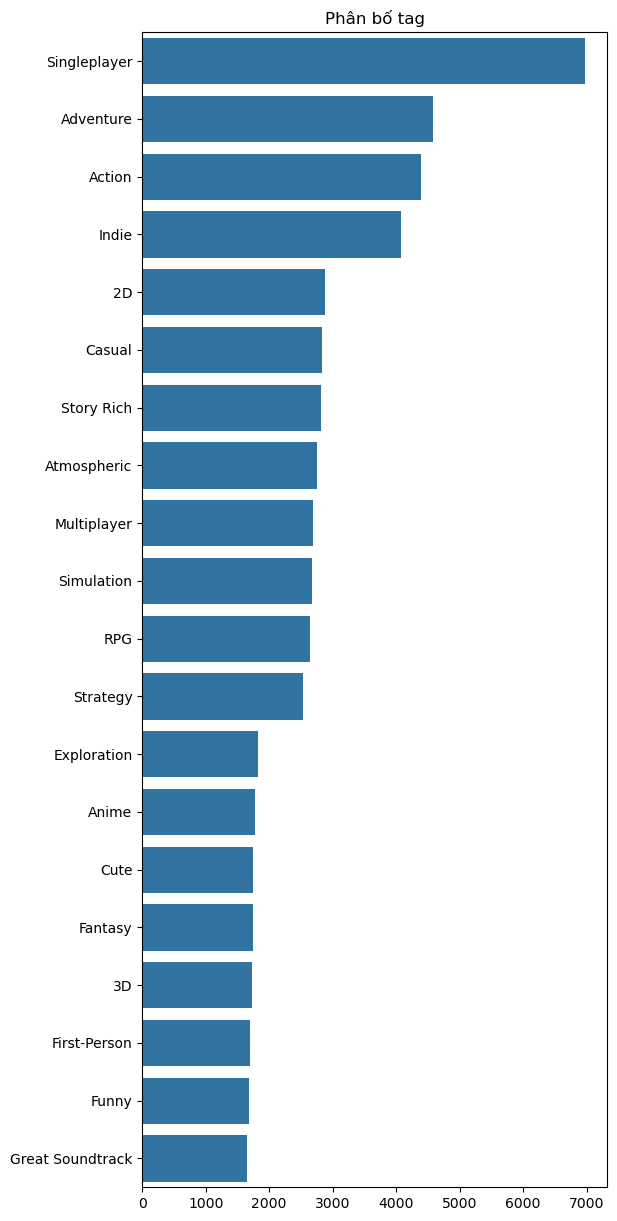

In [35]:
distributed_tag = get_distributed_cat('Tags')
distributed_tag = dict(sorted(distributed_tag.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Ph√¢n b·ªë tag")
sns.barplot(x=list(distributed_tag.values())[:20], y=list(distributed_tag.keys())[:20], ax=ax)

Theo nh∆∞ quan s√°t v√† t√¨m hi·ªÉu, th√¨ `Genre` ƒë∆∞·ª£c ph√¢n lo·∫°i theo ƒë·∫∑c tr∆∞ng ch√≠nh v√† t·ªïng qu√°t c·ªßa game, c√≤n `Tags` l√† ph√¢n lo·∫°i theo c√°c y·∫øu t·ªë, n·ªôi dung trong game m·ªôt c√°ch chi ti·∫øt h∆°n.\
H∆°n n·ªØa do s·ªë l∆∞·ª£ng tag qu√° l·ªõn c√≥ th·ªÉ d·∫´n ƒë·∫øn kh√≥ encode v√† ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu nƒÉng c·ªßa m√¥ h√¨nh, ta n√™n drop n√≥ v√† ch·ªâ c·∫ßn gi·ªØ l·∫°i `Genre`.

In [36]:
df.drop('Tags', axis=1, inplace=True)
df

Title                                   Genre  withDLC  \
0            Baldur's Gate 3                Adventure, RPG, Strategy      1.0   
1           Counter-Strike 2                    Action, Free to Play      1.0   
2             Lethal Company  Action, Adventure, Indie, Early Access      0.0   
3             Cyberpunk 2077                                     RPG      1.0   
4                 ELDEN RING                             Action, RPG      0.0   
...                      ...                                     ...      ...   
9575            Furry Boss üíº    Adventure, Casual, Indie, Simulation      1.0   
9576  Khimera: Puzzle Island                Adventure, Casual, Indie      1.0   
9579                HeXen II                                  Action      0.0   
9581           Time Commando                                  Action      0.0   
9582             DREAM LOGIC                        Adventure, Indie      0.0   

      isMature ReleaseDate          Developer          Publisher  \
0          1.0  2023-08-03     Larian Studios     Larian Studios   
1          1.0  2012-08-21              Valve              Valve   
2          1.0  2023-10-23           Zeekerss           Zeekerss   
3          1.0  2020-12-09     CD PROJEKT RED     CD PROJEKT RED   
4          1.0  2022-02-24  FromSoftware Inc.  FromSoftware Inc.   
...        ...         ...                ...                ...   
9575       1.0  2023-12-02    Dirty Fox Games    Dirty Fox Games   
9576       0.0  2020-11-29    Suits & Sandals    Suits & Sandals   
9579       0.0  1998-03-27     Raven Software        id Software   
9581       0.0  1996-07-31             [2.21]             [2.21]   
9582       1.0  2022-09-06    Teleopsia Games    Teleopsia Games   

                                              Languages  PositiveReviews  \
0     English, French, German, Spanish - Spain, Poli...           7329.0   
1     English, Czech, Danish, Dutch, Finnish, French...           7329.0   
2                                               English           7329.0   
3     English, French, Italian, German, Spanish - Sp...           7329.0   
4     English, French, Italian, German, Spanish - Sp...           7329.0   
...                                                 ...              ...   
9575                                            English             18.0   
9576                                  English, Japanese            184.0   
9579                                            English            372.0   
9581                                            English             57.0   
9582                                            English            221.0   

      TotalReviews  NegativeReviews  OriginalPrice  DiscountPercent  \
0           8630.0           1134.5       470000.0              0.1   
1           8630.0           1134.5            0.0              0.0   
2           8630.0           1134.5       142000.0              0.0   
3           8630.0           1134.5       470000.0              0.5   
4           8630.0           1134.5       470000.0              0.4   
...            ...              ...            ...              ...   
9575          18.0              0.0        73500.0              0.0   
9576         190.0              6.0        73500.0              0.9   
9579         453.0             81.0       112500.0              0.7   
9581          61.0              4.0        87500.0              0.0   
9582         246.0             25.0        73500.0              0.0   

      DiscountedPrice  
0            306875.0  
1                 0.0  
2            142000.0  
3            306875.0  
4            306875.0  
...               ...  
9575          73500.0  
9576           7350.0  
9579          33750.0  
9581          87500.0  
9582          73500.0  

[9269 rows x 14 columns]

### 3.3 S·ªë h√≥a c√°c feature

·ªû ƒë√¢y, ta s·∫Ω b·∫Øt ƒë·∫ßu s·ªë h√≥a c√°c d·ªØ li·ªáu category, datetime v√† boolean ƒë·ªÉ chu·∫©n b·ªã cho hu·∫•n luy·ªán m√¥ h√¨nh

ƒê·∫ßu ti√™n l√† s·ªë h√≥a c·ªôt datetime v√† boolean:

In [37]:
df[['withDLC', 'isMature']] = df[['withDLC', 'isMature']].replace({True: 1, False: 0})
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseDay'] = df['ReleaseDate'].dt.day

Sau khi s·ªë h√≥a c·ªôt datetime, ta ti·∫øn h√†nh drop c·ªôt `ReleaseDate`:

In [38]:
df.drop('ReleaseDate', axis=1, inplace=True)
df

Title                                   Genre  withDLC  \
0            Baldur's Gate 3                Adventure, RPG, Strategy      1.0   
1           Counter-Strike 2                    Action, Free to Play      1.0   
2             Lethal Company  Action, Adventure, Indie, Early Access      0.0   
3             Cyberpunk 2077                                     RPG      1.0   
4                 ELDEN RING                             Action, RPG      0.0   
...                      ...                                     ...      ...   
9575            Furry Boss üíº    Adventure, Casual, Indie, Simulation      1.0   
9576  Khimera: Puzzle Island                Adventure, Casual, Indie      1.0   
9579                HeXen II                                  Action      0.0   
9581           Time Commando                                  Action      0.0   
9582             DREAM LOGIC                        Adventure, Indie      0.0   

      isMature          Developer          Publisher  \
0          1.0     Larian Studios     Larian Studios   
1          1.0              Valve              Valve   
2          1.0           Zeekerss           Zeekerss   
3          1.0     CD PROJEKT RED     CD PROJEKT RED   
4          1.0  FromSoftware Inc.  FromSoftware Inc.   
...        ...                ...                ...   
9575       1.0    Dirty Fox Games    Dirty Fox Games   
9576       0.0    Suits & Sandals    Suits & Sandals   
9579       0.0     Raven Software        id Software   
9581       0.0             [2.21]             [2.21]   
9582       1.0    Teleopsia Games    Teleopsia Games   

                                              Languages  PositiveReviews  \
0     English, French, German, Spanish - Spain, Poli...           7329.0   
1     English, Czech, Danish, Dutch, Finnish, French...           7329.0   
2                                               English           7329.0   
3     English, French, Italian, German, Spanish - Sp...           7329.0   
4     English, French, Italian, German, Spanish - Sp...           7329.0   
...                                                 ...              ...   
9575                                            English             18.0   
9576                                  English, Japanese            184.0   
9579                                            English            372.0   
9581                                            English             57.0   
9582                                            English            221.0   

      TotalReviews  NegativeReviews  OriginalPrice  DiscountPercent  \
0           8630.0           1134.5       470000.0              0.1   
1           8630.0           1134.5            0.0              0.0   
2           8630.0           1134.5       142000.0              0.0   
3           8630.0           1134.5       470000.0              0.5   
4           8630.0           1134.5       470000.0              0.4   
...            ...              ...            ...              ...   
9575          18.0              0.0        73500.0              0.0   
9576         190.0              6.0        73500.0              0.9   
9579         453.0             81.0       112500.0              0.7   
9581          61.0              4.0        87500.0              0.0   
9582         246.0             25.0        73500.0              0.0   

      DiscountedPrice  ReleaseYear  ReleaseMonth  ReleaseDay  
0            306875.0         2023             8           3  
1                 0.0         2012             8          21  
2            142000.0         2023            10          23  
3            306875.0         2020            12           9  
4            306875.0         2022             2          24  
...               ...          ...           ...         ...  
9575          73500.0         2023            12           2  
9576           7350.0         2020            11          29  
9579          33750.0         1998       

## 4. T·∫°o c·ªôt t√≠nh ƒëi·ªÉm cho game

##### Ta s·∫Ω s·ª≠ d·ª•ng c√¥ng th·ª©c sau ƒë·ªÉ t√≠nh score_rating cho t·ª´ng tr√≤ ch∆°i ƒëi·ªán t·ª≠ d·ª±a tr√™n gi√° tr·ªã ·ªü c√°c c·ªôt Reviews v·ªõi mi·ªÅn gi√° tr·ªã sau khi t√≠nh s·∫Ω l√† [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


M·ªôt s·ªë l√Ω do ƒë·ªÉ s·ª≠ d·ª•ng c√¥ng th·ª©c n√†y:
1. T·∫≠p trung v√†o c√°c ph·∫£n h·ªìi t√≠ch c·ª±c, c√≥ nghƒ©a l√† m·ªói ph·∫£n h·ªìi t√≠ch c·ª±c c√≥ t√°c ƒë·ªông l·ªõn h∆°n tr√™n score_rating so v·ªõi ph·∫£n h·ªìi ti√™u c·ª±c
2. M·∫∑c d√π c√¥ng th·ª©c t·∫≠p trung v√† nh·∫•n m·∫°nh ph·∫£n h·ªìi t√≠ch c·ª±c nh∆∞ng kh√¥ng b·ªè qua b·∫•t k√¨ ph·∫£n h·ªìi ti√™u c·ª±c n√†o
3. C√≥ s·ª± c√¢n b·∫±ng khi ta c√¢n nh·∫Øc ph·∫£n h·ªïi t√≠ch c·ª±c th·∫≠t s·ª± quan tr·ªçng h∆°n nh∆∞ng ph·∫£n h·ªìi ti√™u c·ª±c c≈©ng c√≥ ·∫£nh h∆∞·ªüng nh·∫•t ƒë·ªãnh

In [39]:
ReviewScore = df['PositiveReviews'] / df['TotalReviews']
df['Rating'] = ReviewScore - (ReviewScore - 0.5) * pow(2, -np.log10(df['TotalReviews'] + 1))
df

Title                                   Genre  withDLC  \
0            Baldur's Gate 3                Adventure, RPG, Strategy      1.0   
1           Counter-Strike 2                    Action, Free to Play      1.0   
2             Lethal Company  Action, Adventure, Indie, Early Access      0.0   
3             Cyberpunk 2077                                     RPG      1.0   
4                 ELDEN RING                             Action, RPG      0.0   
...                      ...                                     ...      ...   
9575            Furry Boss üíº    Adventure, Casual, Indie, Simulation      1.0   
9576  Khimera: Puzzle Island                Adventure, Casual, Indie      1.0   
9579                HeXen II                                  Action      0.0   
9581           Time Commando                                  Action      0.0   
9582             DREAM LOGIC                        Adventure, Indie      0.0   

      isMature          Developer          Publisher  \
0          1.0     Larian Studios     Larian Studios   
1          1.0              Valve              Valve   
2          1.0           Zeekerss           Zeekerss   
3          1.0     CD PROJEKT RED     CD PROJEKT RED   
4          1.0  FromSoftware Inc.  FromSoftware Inc.   
...        ...                ...                ...   
9575       1.0    Dirty Fox Games    Dirty Fox Games   
9576       0.0    Suits & Sandals    Suits & Sandals   
9579       0.0     Raven Software        id Software   
9581       0.0             [2.21]             [2.21]   
9582       1.0    Teleopsia Games    Teleopsia Games   

                                              Languages  PositiveReviews  \
0     English, French, German, Spanish - Spain, Poli...           7329.0   
1     English, Czech, Danish, Dutch, Finnish, French...           7329.0   
2                                               English           7329.0   
3     English, French, Italian, German, Spanish - Sp...           7329.0   
4     English, French, Italian, German, Spanish - Sp...           7329.0   
...                                                 ...              ...   
9575                                            English             18.0   
9576                                  English, Japanese            184.0   
9579                                            English            372.0   
9581                                            English             57.0   
9582                                            English            221.0   

      TotalReviews  NegativeReviews  OriginalPrice  DiscountPercent  \
0           8630.0           1134.5       470000.0              0.1   
1           8630.0           1134.5            0.0              0.0   
2           8630.0           1134.5       142000.0              0.0   
3           8630.0           1134.5       470000.0              0.5   
4           8630.0           1134.5       470000.0              0.4   
...            ...              ...            ...              ...   
9575          18.0              0.0        73500.0              0.0   
9576         190.0              6.0        73500.0              0.9   
9579         453.0             81.0       112500.0              0.7   
9581          61.0              4.0        87500.0              0.0   
9582         246.0             25.0        73500.0              0.0   

      DiscountedPrice  ReleaseYear  ReleaseMonth  ReleaseDay    Rating  
0            306875.0         2023             8           3  0.826430  
1                 0.0         2012             8          21  0.826430  
2            142000.0         2023            10          23  0.826430  
3            306875.0         2020            12           9  0.826430  
4            306875.0         2022             2          24  0.826430  
...               ...          ...           ...         ...       ...  
9575          73500.0         2023            12           2  0.793924  
9576           7350.0   

**Ti·ªÅn x·ª≠ l√≠ ho√†n t·∫•t, ta xu·∫•t d·ªØ li·ªáu ra m·ªôt file m·ªõi chu·∫©n b·ªã cho giai ƒëo·∫°n h·ªçc m√°y:**

In [40]:
df.to_csv('../data/processed_data.csv', index=False)